In [1]:
import sys; sys.path.append('/rds/general/user/cb2714/home/wwa/'); from wwa import *

xn, xx, yn, yx = [-125,-110,30,40]
sf = gpd.read_file("sf_socal-baja")

---
# CDS download requests

In [1]:
import os, cdsapi
from IPython.display import clear_output

client = cdsapi.Client()

2025-01-13 08:46:52,726 WARNING [2025-01-08T00:00:00] Please be informed that Beta URL (cds-beta) have been now discontinued. If you still need to migrate, please follow [available instructions here](https://forum.ecmwf.int/t/goodbye-legacy-climate-data-store-hello-new-climate-data-store-cds/6380)
2025-01-13 08:46:52,727 INFO [2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.
2025-01-13 08:46:52,728 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-01-13 08:46:52,728 INFO [2024-09-16T00:00:00] Remember that you need to have an ECMWF account to use the new CDS. **Your old CDS c

## Noon FWI variables - ERA5

In [3]:
for y in range(2024,1949,-1):
        
        y = str(y)
        
        new_fnm = "/rds/general/user/cb2714/home/00_WWA_project_folder/ephemeral/cali-wildfires/era5/era5_noon-vars_"+y+".nc"
        print(y)
        if os.path.exists(new_fnm): continue
                
        dataset = "reanalysis-era5-single-levels"
        request = {
            "product_type": ["reanalysis"],
            "variable": [
                "10m_u_component_of_wind",
                "10m_v_component_of_wind",
                "2m_dewpoint_temperature",
                "2m_temperature"
            ],
            "year": [y],
            "month": [
                "01", "02", "03",
                "04", "05", "06",
                "07", "08", "09",
                "10", "11", "12"
            ],
            "day": [
                "01", "02", "03",
                "04", "05", "06",
                "07", "08", "09",
                "10", "11", "12",
                "13", "14", "15",
                "16", "17", "18",
                "19", "20", "21",
                "22", "23", "24",
                "25", "26", "27",
                "28", "29", "30",
                "31"
            ],
            "time": ["20:00"],
            "data_format": "netcdf",
            "download_format": "unarchived",
            "area": [40, -125, 30, -110]
        }

        client.retrieve(dataset, request, new_fnm)
        
clear_output(wait = False)
print("Done.")

Done.


## 24h accumulated precip - ERA5

In [ ]:
for y in range(2023,1950,-1):
        
        y = str(y)
        
        new_fnm = "/rds/general/user/cb2714/projects/wwa/ephemeral/cali-wildfires/era5/era5_pr24h_"+y+".nc"
        print(y)
        if os.path.exists(new_fnm): continue
        
        dataset = "derived-era5-single-levels-daily-statistics"
        request = {
            "product_type": "reanalysis",
            "variable": ["total_precipitation"],
            "year": y,
            "month": [
                "01", "02", "03",
                "04", "05", "06",
                "07", "08", "09",
                "10", "11", "12"
            ],
            "day": [
                "01", "02", "03",
                "04", "05", "06",
                "07", "08", "09",
                "10", "11", "12",
                "13", "14", "15",
                "16", "17", "18",
                "19", "20", "21",
                "22", "23", "24",
                "25", "26", "27",
                "28", "29", "30",
                "31"
            ],
            "daily_statistic": "daily_sum",
            "time_zone": "utc-08:00",
            "frequency": "1_hourly",
            "area": [40, -125, 30, -110],
            'format': 'netcdf'
        }

        client.retrieve(dataset, request, new_fnm)
        clear_output(wait = False)
        
print("Done.")

## Hourly VPD variables - ERA5Land

In [ ]:
for y in range(1980,1949,-1):
    for m in range(1,13):

        y = str(y)
        m = str(m).rjust(2,"0")
        new_fnm = "/rds/general/user/cb2714/home/00_WWA_project_folder/ephemeral/cali-wildfires/era5land/era5land_vpd-vars_"+y+"-"+m+".nc"
        print(y+m)
        if os.path.exists(new_fnm): continue

        dataset = "reanalysis-era5-land"
        request = {
        "variable": [
            "2m_dewpoint_temperature",
            "2m_temperature",
            "10m_u_component_of_wind",
            "10m_v_component_of_wind"
        ],
        "year": y,
        "month": m,
        "day": [
            "01", "02", "03",
            "04", "05", "06",
            "07", "08", "09",
            "10", "11", "12",
            "13", "14", "15",
            "16", "17", "18",
            "19", "20", "21",
            "22", "23", "24",
            "25", "26", "27",
            "28", "29", "30",
            "31"
        ],
        "time": [
            "00:00", "01:00", "02:00",
            "03:00", "04:00", "05:00",
            "06:00", "07:00", "08:00",
            "09:00", "10:00", "11:00",
            "12:00", "13:00", "14:00",
            "15:00", "16:00", "17:00",
            "18:00", "19:00", "20:00",
            "21:00", "22:00", "23:00"
        ],
        "data_format": "netcdf",
        "download_format": "unarchived",
        "area": [40, -125, 30, -110]
        }
        client.retrieve(dataset, request, new_fnm)
        clear_output(wait = False)

print("Done.")

196801


2025-01-13 11:01:11,581 INFO [2025-01-09T00:00:00] Please be aware that ERA5 data from 1st January 2025 was degraded and is being corrected. Watch the [Forum announcement](https://forum.ecmwf.int/t/era5-data-from-1st-january-2025-was-degraded-and-is-being-corrected/10689) for updates.
2025-01-13 11:01:11,582 INFO Request ID is d64941a3-fc47-4b47-b868-4e512e08db07
2025-01-13 11:01:11,633 INFO status has been updated to accepted
2025-01-13 11:03:05,725 INFO status has been updated to running


---
# MSWX FWI

## Extract FWI variables

In [13]:
fpath = "/rds/general/user/cb2714/home/00_WWA_project_folder/live/data/mswx/"
outpath = "/rds/general/user/cb2714/home/00_WWA_project_folder/ephemeral/cali-wildfires/mswx/"

In [18]:
for y in range(2024, 2026):
    print(y, end = " ")
    
    for varnm in ["P", "RelHum", "Tmax", "Wind"]:
        
        new_fnm = outpath+varnm+"_"+str(y)+".nc"
        if os.path.exists(new_fnm): continue
            
        print(varnm, end = " ")
        
        da = wrap_lon(xr.open_mfdataset(fpath+varnm+"/"+str(y)+"/*.nc")).sel(lon = slice(xn,xx), lat = slice(yn,yx))
        da.to_netcdf(new_fnm)
    print("")

2024 RelHum Tmax Wind 
2025 P RelHum Tmax Wind 


## Compute FWI

In [34]:
from xclim.indicators.atmos import cffwis_indices

# compile all the variables
ds = xr.merge([xr.open_mfdataset([fnm for fnm in glob.glob(outpath+"*"+varnm+"*.nc") if fnm[-7:-3] >= "2024"]) for varnm in ["P", "RelHum", "Tmax", "Wind"]]).load()  # 2024-25 only
# ds = xr.merge([xr.open_mfdataset(outpath+"*"+varnm+"*.nc") for varnm in ["P", "RelHum", "Tmax", "Wind"]]).load()
ds = ds.rename(precipitation = "pr", relative_humidity = "hurs", air_temperature = "tas", wind_speed = "sfcWind")

fwi = cffwis_indices(ds = ds, overwintering = False)
fwi = xr.merge(fwi)

fwi.to_netcdf(outpath+"fwi_mswx_2024-2025.nc")

# Compile VPD variables

In [ ]:
fpath = "/rds/general/user/cb2714/home/00_WWA_project_folder/ephemeral/cali-wildfires/"

In [13]:
fl = sorted(glob.glob(fpath+"era5land/era5land_vpd-vars_*.nc"))
fl = [fnm for fnm in fl if int(fnm[-10:-6]) >= 1970]

In [14]:
ds = wrap_lon(xr.open_mfdataset(fl))
ds = ds.reset_coords(drop = True).rename(valid_time = "time")

In [16]:
d2m = convert_units_to(ds.d2m, "degC").load()
t2m = convert_units_to(ds.t2m, "degC").load()
        
vpd = np.exp(17.25*t2m / (243.04 + t2m)) - np.exp(17.25*d2m / (243.04 + d2m))
vpd_max = vpd.resample(time = "D").max().rename("vpd")

tas_max = t2m.resample(time = "D").max()

wspd = (np.sqrt(ds.u10**2 + ds.v10**2)).rename("sfcWind")
wspd_max = wspd.resample(time = "D").max()

In [17]:
vpd_max.to_netcdf(fpath+"era5-land_vpdmax_197001-198012.nc")
tas_max.to_netcdf(fpath+"era5-land_tasmax_197001-198012.nc")
wspd_max.to_netcdf(fpath+"era5-land_sfcWindmax_197001-198012.nc")

/rds/general/user/cb2714/home/anaconda3/envs/wwa/lib/python3.10/site-packages/dask/array/reductions.py:640: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)


---
# Get time series - obs

## Nino indices

### Detrended Nino3.4

Use monthly mean SST from 20S:20N to detrend [Nino3.4](https://climexp.knmi.nl/getindices.cgi?WMO=NCDCData/ersst_nino3.4a&STATION=NINO3.4&TYPE=i&id=someone@somewhere)

In [92]:
# download latest SST data from ERSST
! wget https://downloads.psl.noaa.gov/Datasets/noaa.ersst.v5/sst.mnmean.nc
clear_output(wait = False)

In [2]:
ersst = wrap_lon(xr.open_dataset("sst.mnmean.nc").sst)

# quick method for area-weighted averaging (will add to WWA main but need to generalise dims first)
def awmean(da): return da.weighted(np.cos(np.deg2rad(da.lat))).mean(["lat", "lon"])

In [123]:
nino34 = awmean(ersst.sel(lat = slice(-5,5), lon = slice(-170,-120)))
sst_tropical = awmean(ersst.sel(lat = slice(-20,20)))

nino34_det = (nino34 - sst_tropical).rename("nino34")
nino34_det.to_netcdf("data/ersst_nino34_detrended.nc")

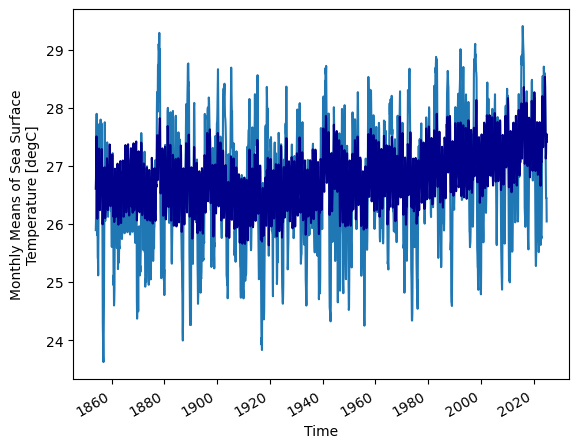

In [116]:
nino34.plot()
sst_tropical.plot(color = "darkblue")

### Nino modoki

$EMI = SST_{C} - 0.5SST_E - 0.5SST_W$

where
$SST_C$ is the SST anomaly from 10S-10N, 165W-140W; $SST_E$ is the SST anomaly from 10S-20N, 125E-145E; and $SST_W$ is the SST anomaly from 15S-5N, 110W-70W.


In [11]:
sst_c = ersst.sel(lat = slice(-10,10), lon = slice(-145,165))
sst_e = ersst.sel(lat = slice(-10,20), lon = slice(125,145))
sst_w = ersst.sel(lat = slice(-15,5), lon = slice(-110,-70))

In [12]:
sst_c_ts = sst_c.mean(["lat", "lon"])
sst_e_ts = sst_e.mean(["lat", "lon"])
sst_w_ts = sst_w.mean(["lat", "lon"])

In [13]:
emi = sst_c_ts - (0.5 * sst_e_ts) - (0.5 * sst_w_ts)
emi.to_dataframe().to_csv("data/nino-modoki.csv")

## Precip & PET

### ERA5-Land

In [17]:
# unzip & compile ERA5-land monthly data
! unzip /rds/general/user/cb2714/home/00_WWA_project_folder/ephemeral/cali-wildfires/era5-land_precip-pet_monthly.zip

In [79]:
d0 = xr.open_dataset("data_0.nc")
d1 = xr.open_dataset("data_1.nc")
ds = xr.concat([d0, d1], "valid_time")[["tp", "pev", "e"]]
ds = wrap_lon(ds.sortby(ds.valid_time).rename(valid_time = "time", latitude = "lat", longitude = "lon"))

ds["tp"] = convert_units_to(ds.tp, "mm")
ds["pev"] = convert_units_to(ds.pev, "mm")

In [80]:
ds.to_netcdf("data/era5-land_precip-pet_monthly.nc")

In [82]:
era5l_rm = regionmask.mask_geopandas(sf, ds.lon, ds.lat)
era5l_ts = ds.where(era5l_rm == 0).mean(["lat", "lon"])
era5l_ts.to_netcdf("data/era5land_precip-pet_monthly_se-cali.nc")

### ERA5

In [89]:
era5 = wrap_lon(xr.open_dataset("data/era5_precip-pet_monthly.nc")).reset_coords(drop = True).rename(valid_time = "time", latitude = "lat", longitude = "lon")

era5["tp"] = convert_units_to(era5.tp, "mm")
era5["pev"] = convert_units_to(era5.pev, "mm")

era5_rm = regionmask.mask_geopandas(sf, era5.lon, era5.lat)
era5_ts = era5.where(era5_rm == 0).mean(["lat", "lon"])
era5_ts.to_netcdf("data/era5_precip-pet_monthly_se-cali.nc")

## SPEI

In [2]:
import lmoments3.distr                     # conda activate xclim; pip install git+https://github.com/OpenHydrology/lmoments3.git
glo = getattr(lmoments3.distr, "glo")      # generalised logistic distribution - needed to fit SPEI

def get_spei(eff_pr, months = range(1,13), calibration_period = slice("1980", "2010")):
    
    ## eff_pr must be a DataArray with a time dimension labelled as a DateTime object

    ## NB CURRENTLY NOTHING IN PLACE TO HANDLE DRY PERIODS IN THE TIME SERIES - USE WITH CAUTION!
    
    # create empty list to hold results
    spei_monthly = []
    
    # fit each calendar month in turn
    for m in months:
        
        # select current calendar month
        epr_m = eff_pr.sel(time = eff_pr.time.dt.month == m)
        
        # estimate parameters over calibration period (PWM seems to give more robust fit, so using xclim fit method - also applies over whole spatial array)
        epr_cal = epr_m.sel(time = calibration_period).copy()
        
        # fit parameters for whole map (has to be done manually due to bug in xclim)
        pars = xr.apply_ufunc(lambda x : np.asarray(list(glo.lmom_fit(x.copy()).values())), epr_cal,
                              input_core_dims = [["time"]], output_core_dims = [["dparams"]], vectorize = True).assign_coords(dparams = ["k", "loc", "scale"])
        
        # running without dry-month normalisation for now - check if needed for this dataset
        spei_m = xr.apply_ufunc(lambda pr, dparams : norm.ppf(glo.cdf(pr, *dparams)), epr_m, pars, 
                                input_core_dims=[["time"],["dparams"]], output_core_dims=[["time"]], vectorize = True).assign_coords(time = epr_m.time)
        
        # replace +ve (-ve) infinite values with finite maximum (minimum) in each grid cell
        spei_finite = xr.concat([spei_m.where(~np.isinf(spei_m)), 
                                 xr.ones_like(spei_m).where(spei_m == np.inf) * spei_m.where(spei_m < np.inf).max("time"),
                                 xr.ones_like(spei_m).where(spei_m == -np.inf) * spei_m.where(spei_m > -np.inf).min("time")], "new").sum("new").copy()
        
        spei_monthly.append(spei_finite)
        
    # concatenate monthly fitted values, reorder & relabel
    spei = xr.concat(spei_monthly, "time").sortby("time").rename("spei")
    
    # clean out existing attributes and replace with new variable description
    for k in list(spei.attrs.keys()): del spei.attrs[k]
    spei = spei.assign_attrs(notes = "Calibrated against "+str(calibration_period.start)+"-"+str(calibration_period.stop))
    spei = spei.where(~np.isnan(eff_pr)).dropna("time", "all")
    
    return spei

In [6]:
ds = xr.open_dataset("data/era5_precip-pet_monthly_se-cali.nc")
eff_precip = ds.tp + ds.pev

In [39]:
eff_precip.groupby("time.month")[1].plot()

In [70]:
fig, axs = plt.subplots(ncols = 3, figsize = (20,4), sharey = True)

for i in range(3):
    ax = axs[i]
    nmonths = [1,3,6][i]
    
    pr = ds.tp.rolling(time = nmonths).mean().groupby("time.month")[1].dropna("time", "any")
    pet = ds.pev.rolling(time = nmonths).mean().groupby("time.month")[1].dropna("time", "any")
    
    pr.plot(ax = ax, label = "Precip")
    pet.plot(ax = ax, label = "PET")
    xyline(pr.time.dt.year.values, pr.values, ax = ax)
    
    ax.plot(pr.time, np.poly1d(np.polyfit(pr.time.dt.year.values, pr.values, 1))(np.sort(pr.time.dt.year.values)), color = "darkblue")
    ax.plot(pet.time, np.poly1d(np.polyfit(pet.time.dt.year.values, pet.values, 1))(np.sort(pet.time.dt.year.values)), color = "orange")

    ax.axhline(0, color = "k", ls = "--")
    ax.legend()
    ax.set_ylabel("Precip / PET (mm)")
    ax.set_title(str(nmonths)+"-month mean precip & PET in January each year")

In [ ]:
eff_precip.plot()

In [10]:
spei1 = get_spei(eff_precip)
spei3 = get_spei(eff_precip.rolling(time = 3).mean())
spei6 = get_spei(eff_precip.rolling(time = 6).mean())

/rds/general/user/cb2714/home/anaconda3/envs/wwa/lib/python3.10/site-packages/lmoments3/distr.py:159: RuntimeWarning: invalid value encountered in power
  u = np.where(k == 0, np.exp(-x), (1. - k * x) ** (1. / k))
/rds/general/user/cb2714/home/anaconda3/envs/wwa/lib/python3.10/site-packages/lmoments3/distr.py:159: RuntimeWarning: invalid value encountered in power
  u = np.where(k == 0, np.exp(-x), (1. - k * x) ** (1. / k))
/rds/general/user/cb2714/home/anaconda3/envs/wwa/lib/python3.10/site-packages/lmoments3/distr.py:159: RuntimeWarning: invalid value encountered in power
  u = np.where(k == 0, np.exp(-x), (1. - k * x) ** (1. / k))
/rds/general/user/cb2714/home/anaconda3/envs/wwa/lib/python3.10/site-packages/lmoments3/distr.py:159: RuntimeWarning: invalid value encountered in power
  u = np.where(k == 0, np.exp(-x), (1. - k * x) ** (1. / k))
/rds/general/user/cb2714/home/anaconda3/envs/wwa/lib/python3.10/site-packages/lmoments3/distr.py:159: RuntimeWarning: invalid value encountered 

In [15]:
spei = xr.merge([spei1.rename("spei1"), spei3.rename("spei3"), spei6.rename("spei6")])

In [16]:
spei.to_netcdf("data/era5_spei.nc")

In [35]:
spei_jan = spei.groupby("time.month")[1]
spei_jan = spei_jan.assign_coords(time = spei_jan.time.dt.year).rename(time = "year").to_pandas()
spei_jan.to_csv("ts/era5_spei-jan.csv")

Text(0.5, 1.0, 'January SPEI (excluding January 2024)')

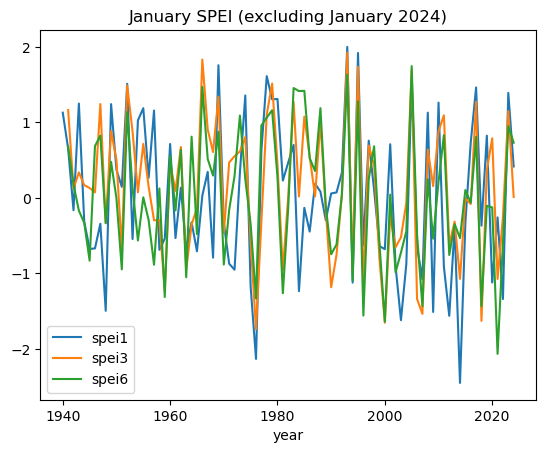

In [37]:
spei_jan.plot()
plt.title("January SPEI (excluding January 2024)")

---
# Extract region from rotated-pole data

In [30]:
import rioxarray as rxr

nam44 = xr.open_dataset("sftlf_NAM-44_ICHEC-EC-EARTH_historical_r0i0p0_SMHI-RCA4_v1_fx.nc").sftlf

# trim data down to larger region of interest
box = np.logical_and(np.logical_and(nam44.lon >= xn, nam44.lon <= xx), np.logical_and(nam44.lat >= yn, nam44.lat <= yx))
box = box.where(box == 1).dropna("rlon", "all").dropna("rlat", "all")
nam44 = nam44.sel(rlon = box.rlon, rlat = box.rlat)
nam44 = nam44.where(nam44 > 0.75)

In [48]:
# specify the CRS for this domain
crs_nam = cartopy.crs.RotatedPole(pole_longitude = -277.0, pole_latitude = 42.5)

# project the shapefile onto the rotated-pole grid
baja_rpole = baja.to_crs(crs_nam)

# relabel the rotated-pole coords and add a CRS
# nam44_rl = nam44.reset_coords(drop = True).rename(rlat = "lat", rlon = "lon").rio.write_crs(crs_nam)

In [49]:
nam44_clipped = nam44.rio.clip(baja_rpole.geometry.values, baja_rpole.crs, all_touched = True)

<GeoAxesSubplot: >

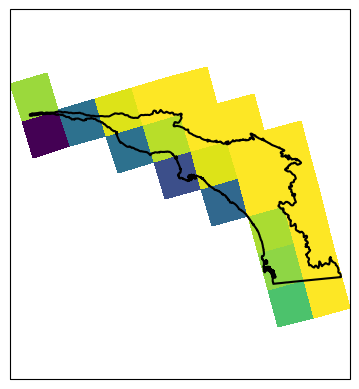

In [59]:
fig, ax = plt.subplots(subplot_kw = {"projection" : mapproj})

ax.pcolormesh(nam44_clipped.lon, nam44_clipped.lat, nam44_clipped)
baja.boundary.plot(ax = ax, color = "k")